In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [9]:
data= pd.read_csv("C://Users/Saba Naseem/Desktop/Machine Learning/Datasets/ex2data1.txt", names=['score1', 'score2', 'result'])

In [10]:
data.head()

,score1,score2,result
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


#### Visualizing the data

In [22]:
pos= data[data['result']==1]
neg=data[data['result']==0]

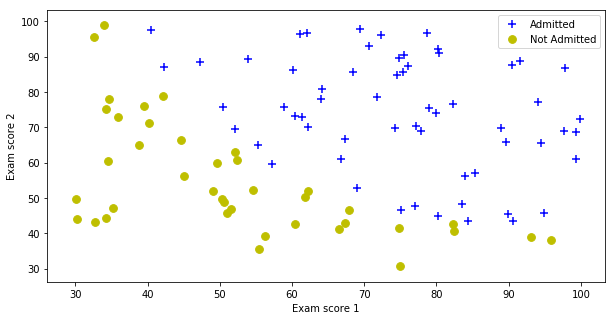

In [23]:
plt.figure(figsize=[10,5])
plt.scatter(pos.score1, pos.score2, marker='+',c='b', s=60, label='Admitted') # c=color, s=size
plt.scatter(neg.score1, neg.score2, marker='o',c='y',s=60, label='Not Admitted')
plt.legend()
plt.xlabel('Exam score 1')
plt.ylabel('Exam score 2')
plt.show()

In [6]:
xdata= pd.DataFrame()
xdata['i']=1
xdata[['score1', 'score2']]= data[['score1', 'score2']]
xdata['i']=1

In [7]:
x= np.asarray(xdata)
y= np.asarray(data['result'])

#### Logistic regression hypothesis: Sigmoid function

In [52]:
def sigmoid(z):
    return (1/(1+ np.exp(-z)))

#### Cost Function

In [9]:
def cost(theta,x,y):
    
    m= len(y)
    h= sigmoid(x.dot(theta))
    cost= (-(y.T.dot(np.log(h))) - (1-y).T.dot(np.log(1-h)))*(1/m)
    
    return cost

In [10]:
theta = [0,0,0]
cost(theta,x,y)

0.6931471805599452

#### Gradient Descent

In [11]:
def gradient(theta,x,y):
   
    m=len(y)
    h= sigmoid(x.dot(theta))
    grad= x.T.dot(h-y)*(1/m)
    
    return grad.flatten()

In [12]:
gradient(theta,x,y)

array([ -0.1       , -12.00921659, -11.26284221])

#### Minimze function to find the best parameter for Logistic Regression cost function

In [99]:
from scipy.optimize import minimize

In [16]:
param = minimize(cost, theta, args=(x,y), jac=gradient, options={'maxiter':400})
param

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


      fun: 0.2034977015894438
 hess_inv: array([[ 3.31474479e+03, -2.63892205e+01, -2.70237122e+01],
       [-2.63892205e+01,  2.23869433e-01,  2.02682332e-01],
       [-2.70237122e+01,  2.02682332e-01,  2.35335117e-01]])
      jac: array([-9.52476820e-09, -9.31921318e-07, -2.82608928e-07])
  message: 'Optimization terminated successfully.'
     nfev: 31
      nit: 23
     njev: 31
   status: 0
  success: True
        x: array([-25.16133284,   0.2062317 ,   0.2014716 ])

In [152]:
def predict(theta, x):
    pred= sigmoid(x.dot(theta))
    return pred

In [18]:
a=np.array([1,45,85])

In [19]:
predict(param.x,a) #sigmoid(-25 + (45*0.206) + (85 * 0.2014))

0.7762907240588947

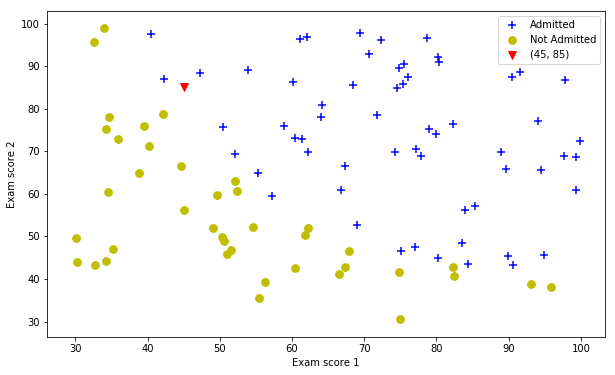

In [103]:
plt.figure(figsize=[10,6])

plt.scatter(pos.score1, pos.score2, marker='+',c='b', s=60, label='Admitted') # c=color, s=size
plt.scatter(neg.score1, neg.score2, marker='o',c='y',s=60, label='Not Admitted')
plt.scatter(45, 85, s=60, c='r', marker='v', label='(45, 85)')
plt.xlabel('Exam score 1')
plt.ylabel('Exam score 2')
plt.legend()
plt.show()

### Regularized logistic regression

In [7]:
data2= pd.read_csv("C://Users/Saba Naseem/Desktop/Machine Learning/Datasets/ex2data2.txt", names=['test1', 'test2', 'result'])

In [8]:
data2.head()

,test1,test2,result
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


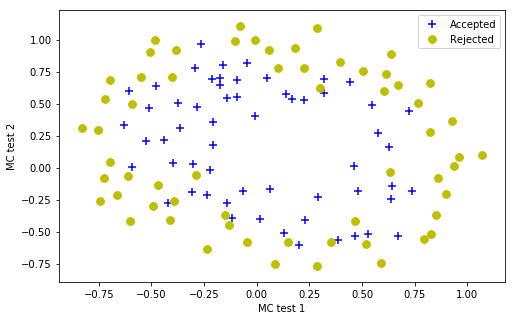

In [26]:
pos2= data2[data2['result']==1]
neg2=data2[data2['result']==0]
plt.figure(figsize=[8,5])
plt.scatter(pos2.test1, pos2.test2, marker='+',c='b', s=60, label='Accepted') # c=color, s=size
plt.scatter(neg2.test1, neg2.test2, marker='o',c='y',s=60, label='Rejected')
plt.legend()
plt.xlabel('MC test 1')
plt.ylabel('MC test 2')
plt.show()

In [27]:
from sklearn.preprocessing import PolynomialFeatures

In [29]:
polynomial= PolynomialFeatures(6)
x2= polynomial.fit_transform(data2[['test1', 'test2']])

In [92]:
y2=np.asarray(data2[['result']])

In [38]:
x2[:1]

array([[1.00000000e+00, 5.12670000e-02, 6.99560000e-01, 2.62830529e-03,
        3.58643425e-02, 4.89384194e-01, 1.34745327e-04, 1.83865725e-03,
        2.50892595e-02, 3.42353606e-01, 6.90798869e-06, 9.42624411e-05,
        1.28625106e-03, 1.75514423e-02, 2.39496889e-01, 3.54151856e-07,
        4.83255257e-06, 6.59422333e-05, 8.99809795e-04, 1.22782870e-02,
        1.67542444e-01, 1.81563032e-08, 2.47750473e-07, 3.38066048e-06,
        4.61305487e-05, 6.29470940e-04, 8.58939846e-03, 1.17205992e-01]])

#### Regularized Cost Function

In [140]:
def cost_func(theta, reg, x, y):
    m=len(y)
    h=sigmoid(x.dot(theta))
    cost= ((-(y.T.dot(np.log(h))) - (1-y).T.dot(np.log(1-h)))*(1/m)) + ((np.sum(theta[1:]**2))*(reg/(2*m)))
    return cost[0]

In [95]:
theta2= np.zeros(x2.shape[1]) # 1 for column size

In [149]:
cost_func(theta2, 1, x2,y2 )

0.6931471805599453

#### Regularized Gradient Descent

In [146]:
def grad_desc(theta,reg,x,y):
   
    m=len(y)
    h= sigmoid(x.dot(theta.reshape(-1,1)))
    grad= (x.T.dot(h-y)*(1/m)) +(reg/m)*np.r_[[[0]],theta[1:].reshape(-1,1)]
    
    return grad.flatten()

In [147]:
grad=grad_desc(theta2,1,x2,y2)
len(grad)

28

#### Minimize function to find best parameters

In [171]:
res2 = minimize(cost_func, theta2, args=(1, x2, y2), method=None, jac=grad_desc, options={'maxiter':3000})
res2.x

array([ 1.27268739,  0.62557016,  1.1809665 , -2.01919822, -0.91761468,
       -1.43194199,  0.12375921, -0.36513086, -0.35703388, -0.17485805,
       -1.45843772, -0.05129676, -0.61603963, -0.2746414 , -1.19282569,
       -0.24270336, -0.20570022, -0.04499768, -0.27782709, -0.29525851,
       -0.45613294, -1.04377851,  0.02762813, -0.29265642,  0.01543393,
       -0.32759318, -0.14389199, -0.92460119])